
Exercise 3 question 9 

In [20]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm

sns.set(style="white")
plt.style.use('seaborn-white')

In [3]:
df = pd.read_csv('/Users/lukwingsan/StatisticalLearning /data/auto.csv')
df = pd.read_csv('/Users/lukwingsan/StatisticalLearning /data/auto.csv', na_values='?').dropna()
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


Question 9 (a)

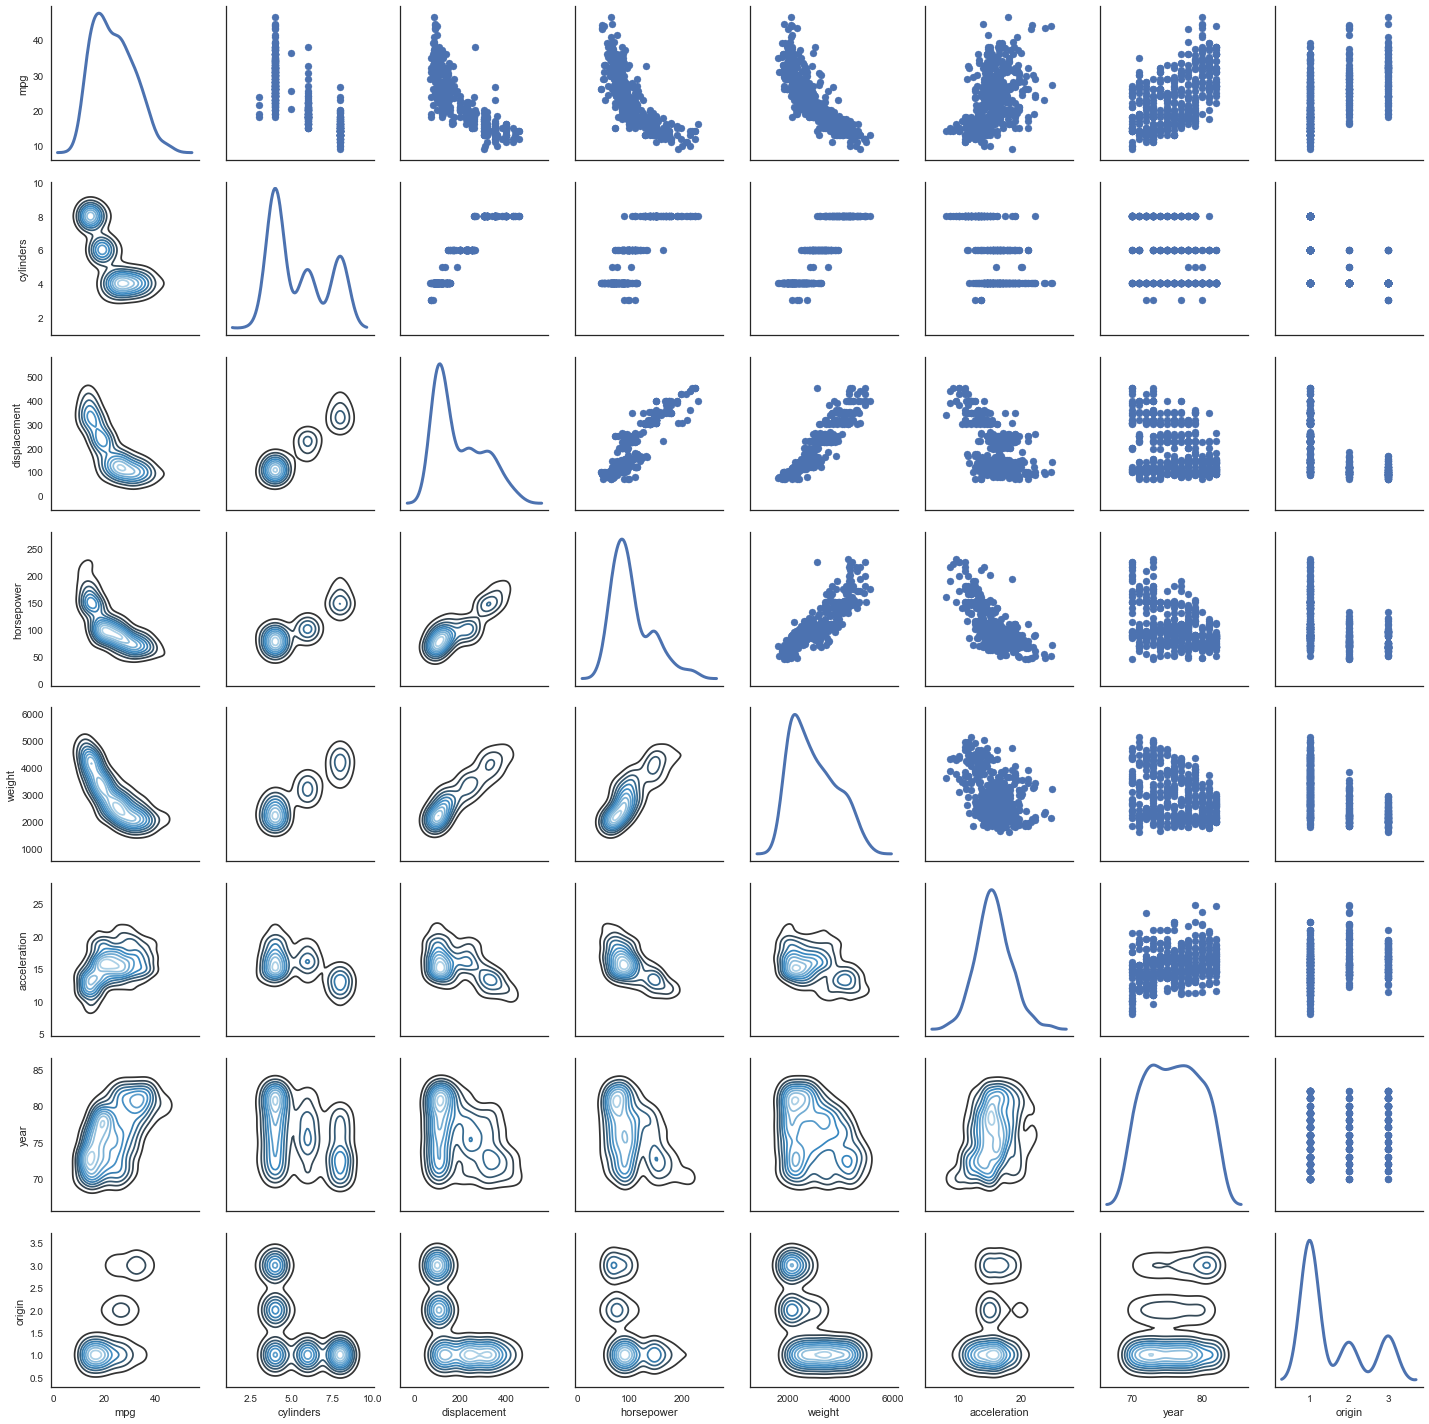

In [4]:


g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3, legend=False);

Question 9(b)

In [5]:

    
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


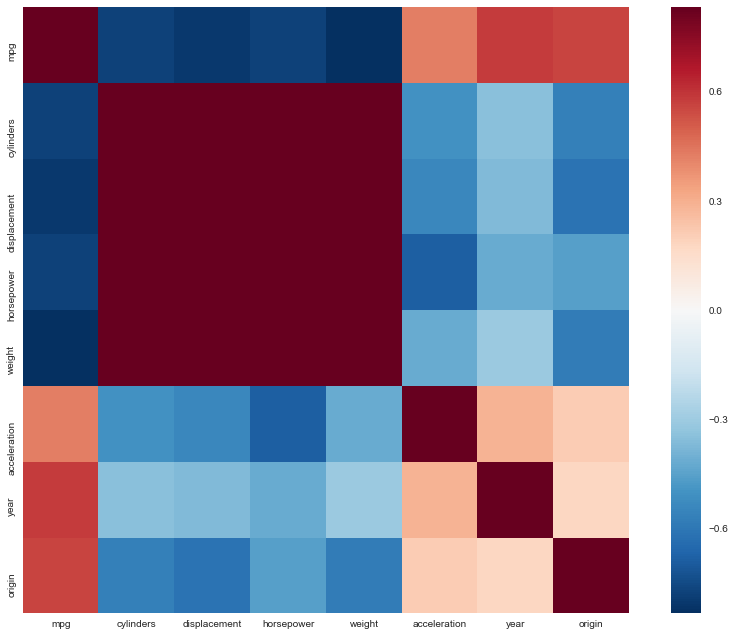

In [6]:
corrmat = df.corr()
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)

f.tight_layout()

Question 9(c)(i)
Answer: Yes, there is a relationship between the predictors and the response as value of the F-statistic is 252 which is far larger than 1. Null hypothesis of all regression coefficients equal to 0 is rejected.
Question 9(c)(ii)
Answer: We can see which predictors have a statistically significant relationship with the response by looking at the p-values in the table above. The predictors that have a statistically significant relationship to the response are definitely weight, year and origin, and we could say displacement as well; while cylinders, horsepower, and acceleration do not.
Question 9(c)(iii)
Answer: The coefficient suggests that, on average, when the other variables are held constant, an increase of one year (of production) corresponds to an increase of 0.75 of mpg (so, the more recent the more efficient).



In [7]:
reg = smf.ols('mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin', df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Tue, 20 Feb 2018   Prob (F-statistic):          2.04e-139
Time:                        03:38:53   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Question 9(d)
Answer: 
No, there are no unusually large outliers, as per the the scale log location. They are however skewedly distributed. The larger the fitted value, the larger the variance, since the spread of the residuals increases.

No, even though there is an observation (number 13) with higher leverage, it is still well within Cook's 0.5 distance.

The normal qq-plot deviates at one extreme, which could indicate that there are other explanatory predictors that we are not considering (quadratic terms, for example). Additionally, the funnel shape of the residuals plot indicates heteroskedacity.

In [8]:
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import ProbPlot

plt.style.use('seaborn') # pretty matplotlib plots
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

model_f = 'mpg ~ cylinders + \
                 displacement + \
                 horsepower + \
                 weight + \
                 acceleration + \
                 year + \
                 origin'

df.reset_index(drop=True, inplace=True)

model = smf.ols(formula=model_f, data=df)

model_fit = model.fit()

# fitted values (need a constant term for intercept)
model_fitted_y = model_fit.fittedvalues

# model residuals
model_residuals = model_fit.resid

# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]

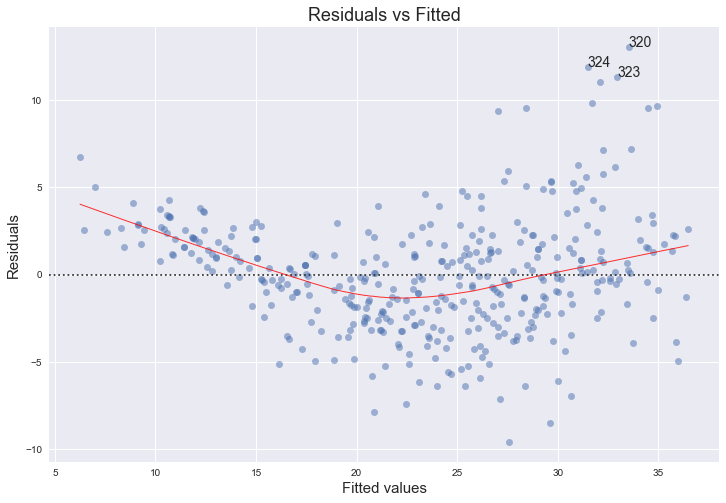

In [9]:
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'mpg', data=df,
                                  lowess=True,
                                  scatter_kws={'alpha': 0.5},
                                  line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')


# annotations
abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]

for i in abs_resid_top_3.index:
    plot_lm_1.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_residuals[i]));

In [ ]:
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]

for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i, 
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

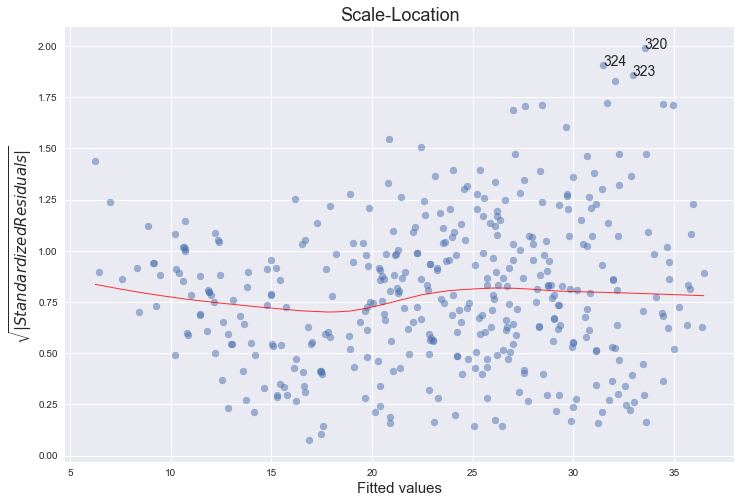

In [11]:
plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)

plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');


for i in abs_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_norm_residuals_abs_sqrt[i]));

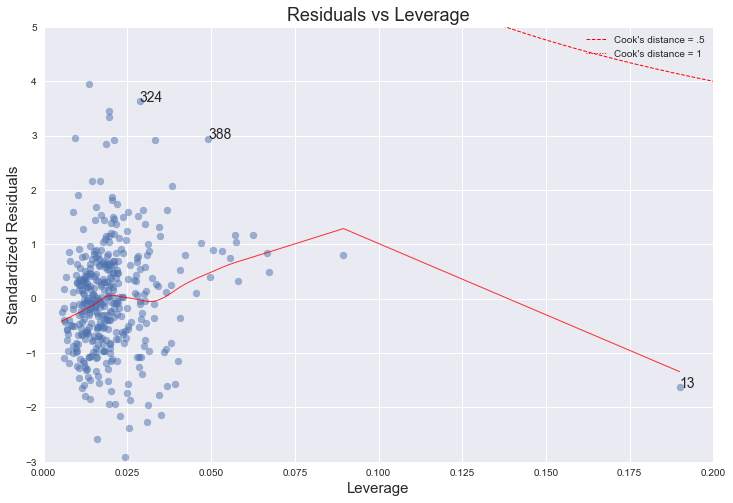

In [12]:
plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(8)
plot_lm_4.set_figwidth(12)

plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(model_leverage, model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_4.axes[0].set_xlim(0, 0.20)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]

for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, 
                               xy=(model_leverage[i], 
                                   model_norm_residuals[i]))
    
# shenanigans for cook's distance contours
def graph(formula, x_range, label=None, ls='-'):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls=ls, color='red')

p = len(model_fit.params) # number of model parameters

graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 
      'Cook\'s distance = .5', ls='--') # 0.5 line

graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 'Cook\'s distance = 1', ls=':') # 1 line

plt.legend(loc='upper right');

Question 9(e)
Answer: The results indicate that the interactions that appear to be statistically significant are displacement:weight, horsepower:origin and horsepower:year.

In [13]:
reg = smf.ols('mpg ~ horsepower*year + displacement + weight + origin', df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     367.0
Date:                Tue, 20 Feb 2018   Prob (F-statistic):          7.51e-156
Time:                        03:41:24   Log-Likelihood:                -987.81
No. Observations:                 392   AIC:                             1990.
Df Residuals:                     385   BIC:                             2017.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -96.6688      9.667    -10.000      0.000    -115.675     -77.663
horsepower          0.7993      0.092      8.687      0.000       0.618       0.980
year                1.8179      0.128     14.221      0.000       1.567       2.069
horsepower:year    -0.0113      0.001     -8.977      0.000      -0.014      -0.009
displacement        0.0068      0.005      1.344      0.180      -0.003       0.017
weight             -0.0054      0.001    -10.170      0.000      -0.006      -0.004
origin              1.1866      0.253      4.684      0.000       0.688       1.685
==============================================================================
Omnibus:                       21.932   Durbin-Watson:                   1.488
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.066
Skew:                           0.411   Prob(JB):                     6.60e-08
Kurtosis:                       4.161   Cond. No.                     5.60e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
model = 'mpg ~ displacement + horsepower + origin + weight + year \
               + displacement:horsepower + displacement:origin + displacement:weight + displacement:year \
               + horsepower:origin + horsepower:weight + horsepower:year + origin:weight + origin:year + weight:year'
reg = smf.ols(model, df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     184.0
Date:                Tue, 20 Feb 2018   Prob (F-statistic):          1.09e-162
Time:                        03:41:54   Log-Likelihood:                -945.49
No. Observations:                 392   AIC:                             1923.
Df Residuals:                     376   BIC:                             1987.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 -51.3746     26.175     -1.963      0.050    -102.843       0.093
displacement               -0.1818      0.120     -1.521      0.129      -0.417       0.053
horsepower                  0.9485      0.232      4.089      0.000       0.492       1.405
origin                     -3.0637      5.496     -0.557      0.578     -13.871       7.744
weight                     -0.0174      0.016     -1.115      0.265      -0.048       0.013
year                        1.3975      0.328      4.267      0.000       0.754       2.042
displacement:horsepower    -0.0001      0.000     -0.815      0.416      -0.000       0.000
displacement:origin         0.0282      0.013      2.172      0.030       0.003       0.054
displacement:weight      2.792e-05   5.99e-06      4.663      0.000    1.61e-05    3.97e-05
displacement:year           0.0010      0.001      0.710      0.478      -0.002       0.004
horsepower:origin          -0.0629      0.020     -3.104      0.002      -0.103      -0.023
horsepower:weight       -1.175e-05   1.77e-05     -0.664      0.507   -4.65e-05     2.3e-05
horsepower:year            -0.0114      0.003     -3.998      0.000      -0.017      -0.006
origin:weight               0.0014      0.001      1.200      0.231      -0.001       0.004
origin:year                 0.0322      0.069      0.464      0.643      -0.104       0.169
weight:year              7.438e-05      0.000      0.394      0.694      -0.000       0.000
==============================================================================
Omnibus:                       52.658   Durbin-Watson:                   1.599
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              115.208
Skew:                           0.710   Prob(JB):                     9.61e-26
Kurtosis:                       5.244   Cond. No.                     1.81e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.81e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Question 9(f)
Answer: We fit the data with a model containing the transformations indicated for the variable horsepower with X^2. It is statistically significant. For  horsepower with X^2 adding log(X), p-value is large which means non-linearity exists and the result is better captured. When adding square root of X to sum of X^2 and log(X), p-value is small. Therefore, it is statistically significant only in the presence of the square root and the logarithm.

In [15]:
reg = smf.ols('mpg ~ horsepower + np.power(horsepower,2) + weight + year + origin', df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     439.5
Date:                Tue, 20 Feb 2018   Prob (F-statistic):          7.11e-157
Time:                        03:42:15   Log-Likelihood:                -988.57
No. Observations:                 392   AIC:                             1989.
Df Residuals:                     386   BIC:                             2013.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -6.6457      3.915     -1.698      0.090     -14.343       1.052
horsepower                 -0.2441      0.027     -9.099      0.000      -0.297      -0.191
np.power(horsepower, 2)     0.0008   9.13e-05      9.170      0.000       0.001       0.001
weight                     -0.0044      0.000    -10.426      0.000      -0.005      -0.004
year                        0.7456      0.046     16.145      0.000       0.655       0.836
origin                      1.0465      0.238      4.405      0.000       0.579       1.514
==============================================================================
Omnibus:                       21.819   Durbin-Watson:                   1.500
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.447
Skew:                           0.414   Prob(JB):                     9.00e-08
Kurtosis:                       4.140   Cond. No.                     4.10e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

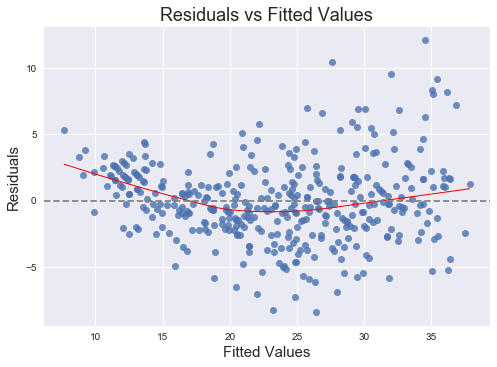

In [16]:
fig = plt.figure()
fitted = reg.fittedvalues
sns.regplot(fitted, df.mpg - fitted,  lowess=True, line_kws={'color':'r', 'lw':1})
ax = fig.axes[0]
ax.axhline(color="grey", ls="--")
ax.set_title("Residuals vs Fitted Values")
ax.set_xlabel("Fitted Values")
ax.set_ylabel("Residuals");

In [17]:
reg = smf.ols('mpg ~ horsepower + np.power(horsepower,2) + np.log(horsepower) + weight + year + origin', df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     378.6
Date:                Tue, 20 Feb 2018   Prob (F-statistic):          4.62e-158
Time:                        03:42:46   Log-Likelihood:                -982.62
No. Observations:                 392   AIC:                             1979.
Df Residuals:                     385   BIC:                             2007.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  80.3681     25.568      3.143      0.002      30.098     130.638
horsepower                  0.2570      0.148      1.737      0.083      -0.034       0.548
np.power(horsepower, 2)    -0.0002      0.000     -0.571      0.568      -0.001       0.000
np.log(horsepower)        -27.5412      8.000     -3.443      0.001     -43.270     -11.812
weight                     -0.0048      0.000    -11.098      0.000      -0.006      -0.004
year                        0.7561      0.046     16.565      0.000       0.666       0.846
origin                      0.9480      0.236      4.016      0.000       0.484       1.412
==============================================================================
Omnibus:                       17.905   Durbin-Watson:                   1.575
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.299
Skew:                           0.312   Prob(JB):                     4.34e-07
Kurtosis:                       4.185   Cond. No.                     2.84e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.84e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
reg = smf.ols('mpg ~ horsepower + np.power(horsepower,2) + np.log(horsepower) + np.sqrt(horsepower) + weight + year + origin', df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     332.9
Date:                Tue, 20 Feb 2018   Prob (F-statistic):          9.16e-159
Time:                        03:43:01   Log-Likelihood:                -977.89
No. Observations:                 392   AIC:                             1972.
Df Residuals:                     384   BIC:                             2004.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                -426.3991    167.288     -2.549      0.011    -755.314     -97.485
horsepower                  8.4452      2.676      3.156      0.002       3.184      13.706
np.power(horsepower, 2)    -0.0060      0.002     -3.117      0.002      -0.010      -0.002
np.log(horsepower)        416.0064    144.951      2.870      0.004     131.009     701.004
np.sqrt(horsepower)      -229.6161     74.927     -3.065      0.002    -376.934     -82.298
weight                     -0.0048      0.000    -11.229      0.000      -0.006      -0.004
year                        0.7475      0.045     16.522      0.000       0.659       0.836
origin                      0.9088      0.234      3.886      0.000       0.449       1.369
==============================================================================
Omnibus:                       23.395   Durbin-Watson:                   1.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.804
Skew:                           0.411   Prob(JB):                     6.18e-09
Kurtosis:                       4.281   Cond. No.                     2.50e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""